# 1. Introducción a la regression

Realicemos una predicción basada en una regresión lineal. 
Se parte de los datos analizados, normalizados y acotados logrados en el punto 0, para el training.

Este método se basa en hacer una predicción basada en regresiones lineales con y sin regularización.

Partiendo de una contrucción del modelo, haremos un proceso iterativo de validación y ajuste del mismo (modificando parámetros y variables), hasta obtener el que mejor predice nuestra target, sin infra o sobreajustes

## Importación de datos y selección de variables


In [1]:
#Librerías a usar

import pandas as pd
import numpy as np

#Importación de datos
data = pd.read_csv("data/PreciosCasas/train_final.csv", sep='\t', encoding='utf-8') 

# print a summary of the data in Melbourne data
data.describe()

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,728.805765,729.805765,56.877145,10460.434454,6.094715,5.576527,1971.194235,1984.818806,439.128346,46.645161,...,0.003432,0.082361,0.002059,0.868909,0.069321,0.002745,0.008236,0.013727,0.821551,0.084420
std,421.402158,421.402158,42.339638,9862.564977,1.376542,1.113638,30.190353,20.640669,432.964939,161.471529,...,0.058500,0.275008,0.045345,0.337616,0.254086,0.052342,0.090410,0.116395,0.383022,0.278112
min,0.000000,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,365.000000,20.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,729.000000,730.000000,50.000000,9473.000000,6.000000,5.000000,1972.000000,1994.000000,383.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1093.000000,1094.000000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,712.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1459.000000,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2188.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
data.shape

(1457, 223)


### Reescalado

Al contrario que en otros modelos, cuando se aplican modelos de regresión lineal con terminos de penalización (como Lasso o Ridge), debemos tener las variables en la misma escala

In [3]:
data = (data - data.min()) / data.max()
print(data.max().max())
print(data.min().min())


1.0
0.0


In [4]:
#Vamos a ver que variables elegimos: todas como columnas y el SalesPrice como target

X= data.ix[:, data.columns != 'Unnamed: 0']
X= X.loc[:, X.columns != 'SalePrice']
X= X.loc[:, X.columns != 'Id']

print (X.head())

y= data['SalePrice']

   MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    0.210526  0.033218          0.6     0.444444   0.065174      0.026368   
1    0.000000  0.038561          0.5     0.777778   0.051741      0.012935   
2    0.210526  0.046226          0.6     0.444444   0.064179      0.025871   
3    0.263158  0.038328          0.6     0.444444   0.021393      0.009950   
4    0.210526  0.060210          0.7     0.444444   0.063682      0.024876   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
0    0.322669         0.0   0.064212     0.836537          ...             
1    0.446984         0.0   0.121575     0.884574          ...             
2    0.222121         0.0   0.185788     0.845458          ...             
3    0.098720         0.0   0.231164     0.821168          ...             
4    0.299360         0.0   0.209760     0.872532          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
X.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,0.194090,0.042558,0.509472,0.508503,0.049350,0.017323,0.200699,0.031645,0.242818,0.835970,...,0.003432,0.082361,0.002059,0.868909,0.069321,0.002745,0.008236,0.013727,0.821551,0.084420
std,0.222840,0.045820,0.137654,0.123738,0.015020,0.010269,0.197882,0.109546,0.189303,0.141833,...,0.058500,0.275008,0.045345,0.337616,0.254086,0.052342,0.090410,0.116395,0.383022,0.278112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028990,0.400000,0.444444,0.040796,0.008458,0.000000,0.000000,0.095462,0.827546,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.157895,0.037971,0.500000,0.444444,0.049751,0.021891,0.175046,0.000000,0.205051,0.854657,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.263158,0.047852,0.600000,0.555556,0.063682,0.026866,0.325411,0.000000,0.345890,0.887960,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.894737,0.993960,0.900000,0.888889,0.068657,0.029851,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X.columns.values

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'ConBasement', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
     

## Implementación del modelo de Regresión

Haremos primero una regresión lineal sin regularizar, analizaremos el modelo, y luego iremos probando con los distintos tipos de regularización a ver como lo vamos mejorando.

- **A. Regresión lineal sin regularizar**

    Para ser capaces de ir validando el modelo, lo separaremos en dos grupos, predictors and target. Lo haremos mediando un split con un número generaro aleatorio. Como queremos que todas las veces que ejecutemos el modelo nos salga lo mismo, estableceremos el argumento de random_state.


In [5]:
#Importación de librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


#Separamos los datos en dos grupos, 
train_X, val_X, train_y, val_y = train_test_split( X, y,random_state = 0)


In [6]:
# Modelo de Regresión lineal 
LR = LinearRegression()
LR.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
#Variables que más influyen
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(train_X.columns[maxcoef[i]], coef[i]))

ExterQual_Gd............. -6.9489e+09
ExterQual_TA............. -6.9489e+09
ExterQual_Ex............. -6.9489e+09
ExterQual_Fa............. -6.9489e+09
Foundation_Slab.......... -5.5183e+09


Vemos que el modelo está demasiado sobreajustado y que el error es increible ( se ve en el grafico que como modelo, no mola nada). Seguramente es por culpa de esas variables 

*Nota: se supone que esto se miró en el punto de "Analisis de los datos" y con los mapas de calor se quitaron las variables dependientes, así que avancemos en ajustar este modelo y veamos que va pasando*

In [62]:
train_X['ExterQual_Gd'].head(5)

743    1.0
581    0.0
649    1.0
968    0.0
744    0.0
Name: ExterQual_Gd, dtype: float64

In [39]:
prediccion = LR.predict(val_X)
print(mean_absolute_error(val_y, prediccion))

59037908.4444


Es un error enorme ...  a ver si es que no está bien normalizada o algo, a ver que valores da

In [72]:
print (prediccion [:100])

[  9.98039246e-02   1.10774994e-01   7.30934143e-02   9.94567871e-02
   1.57463074e-01   1.08695984e-01   1.20983124e-01   9.48448181e-02
   1.05091095e-01   1.29047394e-01   1.27277374e-01   1.32987976e-01
   1.22764587e-01   1.02806091e-01   6.16302490e-02   1.06693268e-01
   1.33838654e-01   6.25419617e-02   1.17435455e-01   1.79565430e-01
   1.55071259e-01   1.15039825e-01   1.56276703e-01   6.94084167e-02
   8.43353271e-02   1.02645874e-01   8.93592834e-02   3.52630615e-02
   1.18572235e-01   1.63372040e-01   1.13075256e-01   1.11354828e-01
   1.39125824e-01   1.29100800e-01   1.43075807e+08   1.05571747e-01
   9.40780640e-02   9.61494446e-02   1.05480194e-01   8.89015198e-02
   9.41429138e-02   1.22219086e-01   1.52900696e-01   9.47456360e-02
   1.26678467e-01   1.32843018e-01   1.54823303e-01   9.11827087e-02
   8.32519531e-02   1.43558502e-01   1.50093079e-01   7.96012878e-02
   2.66182244e+09   1.00574493e-01   1.76948547e-01   1.44405365e-01
   1.56070709e-01   9.56420898e-02

In [73]:
print(max(prediccion))

5518334496.09


In [75]:
val_y.head(5)

411    0.105231
211    0.123629
342    0.067912
303    0.107687
159    0.163718
Name: SalePrice, dtype: float64

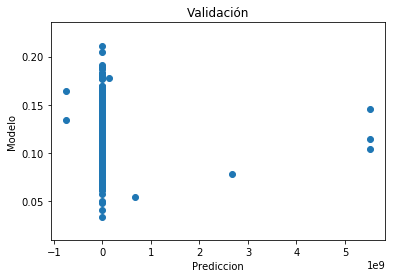

In [76]:
# Veamoslo en un scatter plot
plt.scatter(prediccion,val_y);
plt.title('Validación');
plt.ylabel('Modelo');
plt.xlabel('Prediccion');
plt.show()

En este caso el modelo funciona fatal, tiene un error increible, así que empecemos con los ajustes (no se que hace que val_y se vaya a valores tan tan grandes)

- **B. Regresión lineal con Lasso**


In [77]:
# Modelo de Regresión lineal Lasso
Ls = LassoCV()
Ls.fit(train_X, train_y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

0.00580883955651


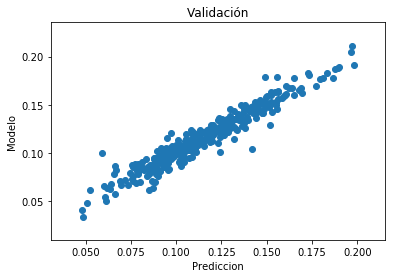

In [78]:
prediccion = Ls.predict(val_X)
print(mean_absolute_error(val_y, prediccion));
# Veamoslo en un scatter plot
plt.scatter(prediccion,val_y);
plt.title('Validación');
plt.ylabel('Modelo');
plt.xlabel('Prediccion');
plt.show()

In [80]:
#Variables que más influyen
maxcoef = np.argsort(-np.abs(Ls.coef_))
coef = Ls.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(train_X.columns[maxcoef[i]], coef[i]))

1stFlrSF.................  6.9496e-02
OverallQual..............  4.6398e-02
2ndFlrSF.................  3.0952e-02
MSZoning_C (all)......... -2.4161e-02
OverallCond..............  2.2589e-02


Ahora mejor, es cierto que el tamaño de la planta (1stFlrSF) y la calidad (OverallQual) son variables a tener en cuenta para decidir el precio


- **C. Regresión lineal Ridge**


In [81]:
# Modelo de Regresión lineal Ridge
Rr = RidgeCV()
Rr.fit(train_X, train_y)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

0.0058203782161


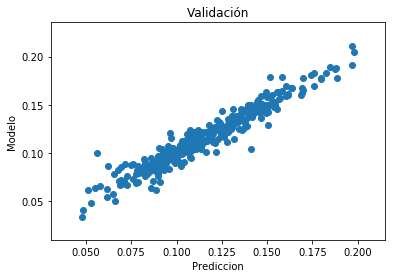

In [82]:
prediccion = Rr.predict(val_X)
print(mean_absolute_error(val_y, prediccion));
# Veamoslo en un scatter plot
plt.scatter(prediccion,val_y);
plt.title('Validación');
plt.ylabel('Modelo');
plt.xlabel('Prediccion');
plt.show()

In [83]:
#Variables que más influyen
maxcoef = np.argsort(-np.abs(Rr.coef_))
coef = Rr.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(train_X.columns[maxcoef[i]], coef[i]))

1stFlrSF.................  4.2623e-02
OverallQual..............  3.5928e-02
BsmtFinSF1...............  2.4514e-02
2ndFlrSF.................  2.3680e-02
OverallCond..............  2.2592e-02


Similar a lo obtenido en L1, así que bien. Veamos que pasa si juntamos ahora las dos regularizaciones


- **D. Regresión lineal elástica**

La ventaja de juntar las dos, es que si dos variables están correlacionadas, va a mantener las dos

In [84]:
# Modelo de Regresión lineal elastic net
EN = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5)) 
# intentamos aplanar el Rr 
train_EN = EN.fit(train_X, train_y)


0.00580883955651


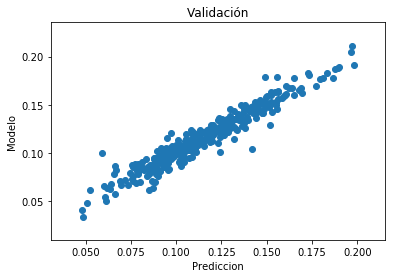

In [85]:
prediccion = EN.predict(val_X)
print(mean_absolute_error(val_y, prediccion));
# Veamoslo en un scatter plot
plt.scatter(prediccion,val_y);
plt.title('Validación');
plt.ylabel('Modelo');
plt.xlabel('Prediccion');
plt.show()

In [86]:
#Variables que más influyen
maxcoef = np.argsort(-np.abs(EN.coef_))
coef = EN.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(train_X.columns[maxcoef[i]], coef[i]))

1stFlrSF.................  6.9496e-02
OverallQual..............  4.6398e-02
2ndFlrSF.................  3.0952e-02
MSZoning_C (all)......... -2.4161e-02
OverallCond..............  2.2589e-02


Perfecto, similar a los otros dos, pero claro... ¿cuál es mejor?

## Selección

Comparemos todas las opciones

In [90]:
model = [LR, Ls, Rr, EN]
M = len(model)
CV = 5
score = np.empty((M, CV))
for i in range(0, M):
    score[i, :] = cross_val_score(model[i], train_X, train_y, cv=CV)

In [91]:
print(score.mean(axis=1))

[ -9.21922473e+19   9.05242830e-01   9.03667926e-01   9.05648376e-01]


La regresión lineal no parece funcionar muy bien, por eso necesita regularización (cualquiera de las tres que hemos aplicado ya sería buena y lo mejora todo un montón), no obstante, para estos datos, no parece que este modelo sea el mejor